In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [33]:
import pandas as pd

df = pd.read_csv("../data/retail_sales.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [34]:
import os
os.getcwd()


'c:\\Users\\Vaishnavi\\OneDrive\\Desktop\\Oasis_Infobyte\\EDA_Retail_sales\\notebooks'

In [35]:
df.shape


(1000, 9)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [37]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [38]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert Date column (if exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])


In [39]:
df.describe()


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [40]:
if 'Date' in df.columns and 'Sales' in df.columns:
    df.groupby(df['Date'].dt.month)['Sales'].sum().plot(
        kind='line', marker='o', figsize=(10,5)
    )
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.show()


In [41]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [42]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [43]:
['transaction_id', 'date', 'customer_id', 'gender', 'age',
 'product_category', 'quantity', 'price_per_unit', 'total_amount']


['transaction_id',
 'date',
 'customer_id',
 'gender',
 'age',
 'product_category',
 'quantity',
 'price_per_unit',
 'total_amount']

In [44]:
df.groupby('product_category')['total_amount'] \
  .sum() \
  .sort_values(ascending=False) \
  .head(10)


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


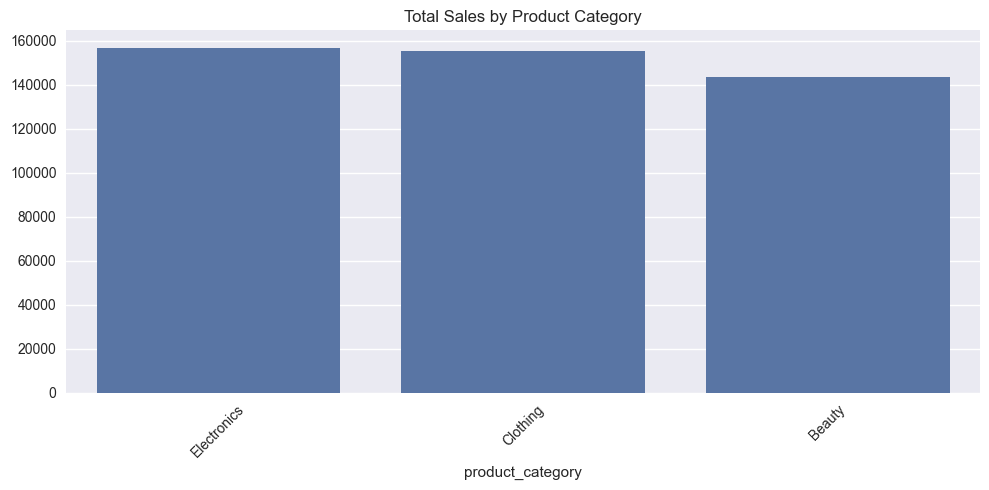

In [53]:
# --- Chart 1 ---
plt.figure(figsize=(10,5))

category_sales = (
    df.groupby('product_category')['total_amount']
      .sum()
      .sort_values(ascending=False)
)

sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("../visuals/sales_by_category.png", dpi=300, bbox_inches="tight")
plt.show()


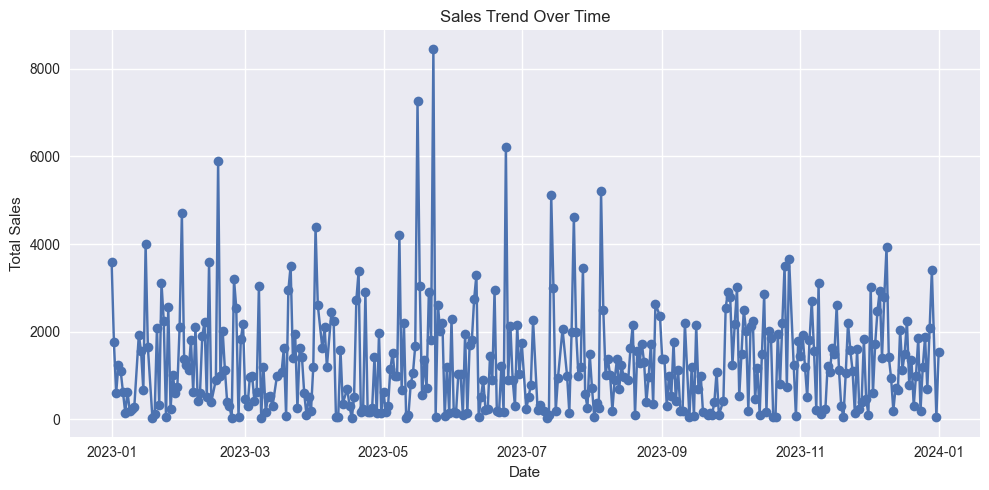

In [54]:
# --- Chart 2 ---
plt.figure(figsize=(10,5))

daily_sales = df.groupby('date')['total_amount'].sum()
plt.plot(daily_sales.index, daily_sales.values, marker='o')

plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("../visuals/sales_trend_over_time.png", dpi=300, bbox_inches="tight")
plt.show()


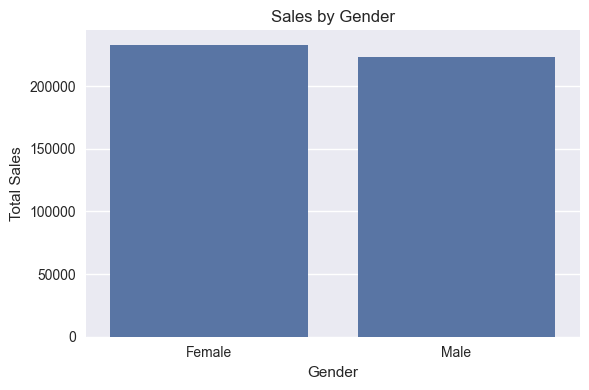

In [55]:
# --- Chart 3 ---
plt.figure(figsize=(6,4))

gender_sales = df.groupby('gender')['total_amount'].sum()
sns.barplot(x=gender_sales.index, y=gender_sales.values)

plt.title("Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("../visuals/sales_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()


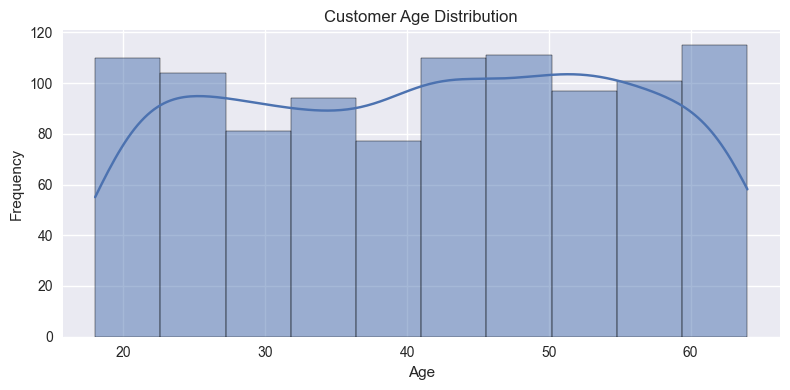

In [56]:
# --- Chart 4 ---
plt.figure(figsize=(8,4))

sns.histplot(df['age'], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()

plt.savefig("../visuals/age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


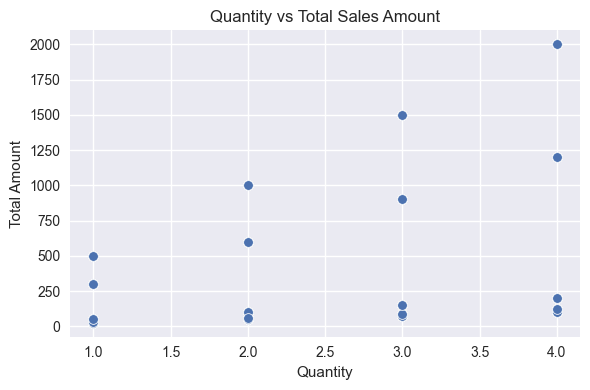

In [57]:
# --- Chart 5 ---
plt.figure(figsize=(6,4))

sns.scatterplot(x='quantity', y='total_amount', data=df)
plt.title("Quantity vs Total Sales Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.tight_layout()

plt.savefig("../visuals/quantity_vs_sales.png", dpi=300, bbox_inches="tight")
plt.show()


In [51]:
import os


In [52]:
plt.savefig("../visuals/sales_by_category.png", bbox_inches="tight")
plt.show()


<Figure size 800x550 with 0 Axes>

## 🔍 Key Business Insights

1. **Product Category Performance**
   - Certain product categories contribute significantly more to total sales compared to others.
   - This indicates a clear customer preference and higher demand for specific categories.

2. **Sales Trend Over Time**
   - Sales show noticeable fluctuations over time, suggesting the presence of seasonal or time-based buying behavior.
   - Periods of higher sales may align with promotions or festive seasons.

3. **Customer Demographics**
   - Sales contribution varies across genders, indicating potential differences in purchasing behavior.
   - The majority of customers fall within a specific age group, highlighting the core target audience.

4. **Purchase Behavior**
   - A positive relationship exists between quantity purchased and total sales amount.
   - Bulk purchases significantly impact revenue generation.

5. **Revenue Concentration**
   - A small number of product categories account for a large portion of total revenue, following the Pareto (80/20) principle.


## 📈 Business Recommendations

1. **Inventory Optimization**
   - Increase stock availability for high-performing product categories to avoid stock-outs.
   - Monitor low-performing categories and reduce excess inventory.

2. **Targeted Marketing**
   - Design promotional campaigns focusing on top-selling categories.
   - Offer personalized discounts based on customer age and gender insights.

3. **Seasonal Planning**
   - Prepare inventory and marketing strategies ahead of high-sales periods.
   - Launch time-bound offers during peak sales windows.

4. **Customer Retention Strategies**
   - Encourage repeat purchases through loyalty programs and bulk purchase discounts.
   - Engage core customer segments with customized communication.

5. **Data-Driven Decision Making**
   - Continuously track sales trends to quickly respond to changing customer behavior.
   - Integrate real-time dashboards for ongoing monitoring.


## ✅ Conclusion

This exploratory data analysis provided meaningful insights into retail sales performance, customer behavior, and product trends. 
The findings can help businesses improve inventory management, enhance marketing strategies, and increase overall profitability.
